In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
old_gen = pd.read_csv('old-generator-results.csv')

old_gen.rename(columns={
    'time': 'bf_time',
    'num_workflows': 'bf_num_workflows',
}, inplace=True)
old_gen = old_gen.drop("overlap", axis='columns')

old_gen

,comps,reqs_per_comp,comps_per_req,bf_time,bf_num_workflows
0,5,1,1,0.956342,5
1,5,1,2,0.591589,10
2,5,1,3,0.865836,15
3,5,1,4,1.141612,20
4,5,1,5,1.429048,25
...,...,...,...,...,...
70,100,5,1,24.185833,100
71,100,5,2,571.952166,3200
72,100,5,3,4332.875147,24300
73,100,5,4,18399.777757,102400


In [25]:
worst_case = pd.read_csv('worst-case-runs/worst-case-results/worst-case-results.csv')

worst_case.rename(columns={
    'time': 'wc_time',
    'num_workflows': 'wc_num_workflows',
}, inplace=True)
worst_case = worst_case.drop("overlap", axis='columns')

worst_case

,comps,reqs_per_comp,comps_per_req,wc_time,wc_num_workflows
0,5,1,1,1.003405,5
1,5,1,2,0.332681,5
2,5,1,3,0.581022,10
3,5,1,4,0.595155,10
4,5,1,5,0.834120,15
...,...,...,...,...,...
70,100,5,1,22.756256,100
71,100,5,2,24.321285,100
72,100,5,3,496.158971,3200
73,100,5,4,509.604695,3200


In [26]:
best_case = pd.read_csv('best-case-runs/results/best-case-results.csv')

best_case.rename(columns={
    'time': 'bc_time',
    'num_workflows': 'bc_num_workflows',
}, inplace=True)
best_case = best_case.drop("overlap", axis='columns')

best_case

,comps,reqs_per_comp,comps_per_req,bc_time,bc_num_workflows
0,5,1,1,0.924474,5
1,5,1,2,0.323870,5
2,5,1,3,0.343784,5
3,5,1,4,0.363198,5
4,5,1,5,0.382169,5
...,...,...,...,...,...
70,100,5,1,22.936935,100
71,100,5,2,24.485708,100
72,100,5,3,26.151663,100
73,100,5,4,27.859172,100


In [27]:
results_df = pd.merge(worst_case, best_case, on=['comps', 'reqs_per_comp', 'comps_per_req'])

results_df = pd.merge(results_df, old_gen, on=['comps', 'reqs_per_comp', 'comps_per_req'])

results_df

,comps,reqs_per_comp,comps_per_req,wc_time,wc_num_workflows,bc_time,bc_num_workflows,bf_time,bf_num_workflows
0,5,1,1,1.003405,5,0.924474,5,0.956342,5
1,5,1,2,0.332681,5,0.323870,5,0.591589,10
2,5,1,3,0.581022,10,0.343784,5,0.865836,15
3,5,1,4,0.595155,10,0.363198,5,1.141612,20
4,5,1,5,0.834120,15,0.382169,5,1.429048,25
...,...,...,...,...,...,...,...,...,...
70,100,5,1,22.756256,100,22.936935,100,24.185833,100
71,100,5,2,24.321285,100,24.485708,100,571.952166,3200
72,100,5,3,496.158971,3200,26.151663,100,4332.875147,24300
73,100,5,4,509.604695,3200,27.859172,100,18399.777757,102400


In [28]:
results_df['c_rpc_cpr'] = results_df.apply(lambda row: f"({int(row['comps'])}, {int(row['reqs_per_comp'])}, {int(row['comps_per_req'])})", axis=1)

results_df

,comps,reqs_per_comp,comps_per_req,wc_time,wc_num_workflows,bc_time,bc_num_workflows,bf_time,bf_num_workflows,c_rpc_cpr
0,5,1,1,1.003405,5,0.924474,5,0.956342,5,"(5, 1, 1)"
1,5,1,2,0.332681,5,0.323870,5,0.591589,10,"(5, 1, 2)"
2,5,1,3,0.581022,10,0.343784,5,0.865836,15,"(5, 1, 3)"
3,5,1,4,0.595155,10,0.363198,5,1.141612,20,"(5, 1, 4)"
4,5,1,5,0.834120,15,0.382169,5,1.429048,25,"(5, 1, 5)"
...,...,...,...,...,...,...,...,...,...,...
70,100,5,1,22.756256,100,22.936935,100,24.185833,100,"(100, 5, 1)"
71,100,5,2,24.321285,100,24.485708,100,571.952166,3200,"(100, 5, 2)"
72,100,5,3,496.158971,3200,26.151663,100,4332.875147,24300,"(100, 5, 3)"
73,100,5,4,509.604695,3200,27.859172,100,18399.777757,102400,"(100, 5, 4)"


## Execution Time with #Workflows

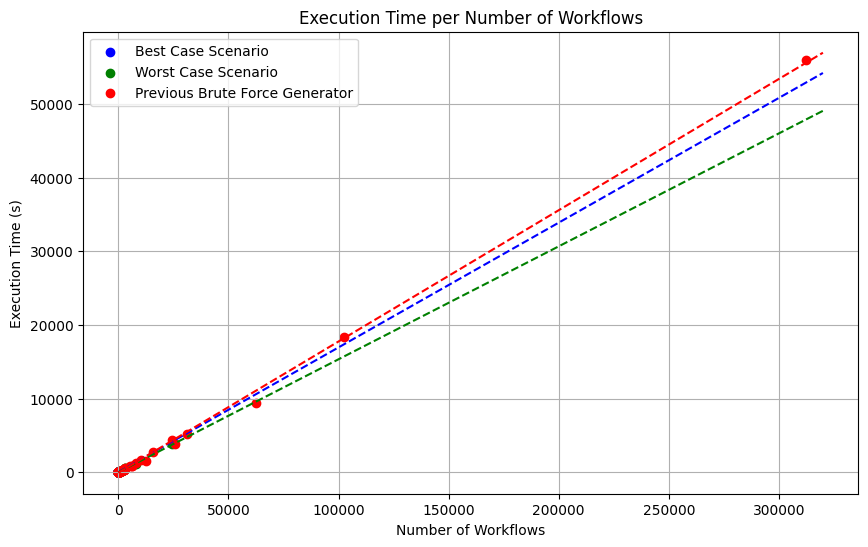

In [29]:
from numpy.polynomial.polynomial import Polynomial
import numpy as np

poly1 = Polynomial.fit(results_df['bc_num_workflows'], results_df['bc_time'], deg=1)
poly2 = Polynomial.fit(results_df['wc_num_workflows'], results_df['wc_time'], deg=1)
poly3 = Polynomial.fit(results_df['bf_num_workflows'], results_df['bf_time'], deg=1)

x_range = np.linspace(0, 320000, 500)

plt.figure(figsize=(10, 6))

plt.scatter(results_df['bc_num_workflows'], results_df['bc_time'], color='blue', label='Best Case Scenario')
plt.scatter(results_df['wc_num_workflows'], results_df['wc_time'], color='green', label='Worst Case Scenario')
plt.scatter(results_df['bf_num_workflows'], results_df['bf_time'], color='red', label='Previous Brute Force Generator')

plt.plot(x_range, poly1(x_range), color='blue', linestyle='--')
plt.plot(x_range, poly2(x_range), color='green', linestyle='--')
plt.plot(x_range, poly3(x_range), color='red', linestyle='--')

plt.title('Execution Time per Number of Workflows')
plt.xlabel('Number of Workflows')
plt.ylabel('Execution Time (s)')
plt.legend()
plt.grid(True)
plt.show()

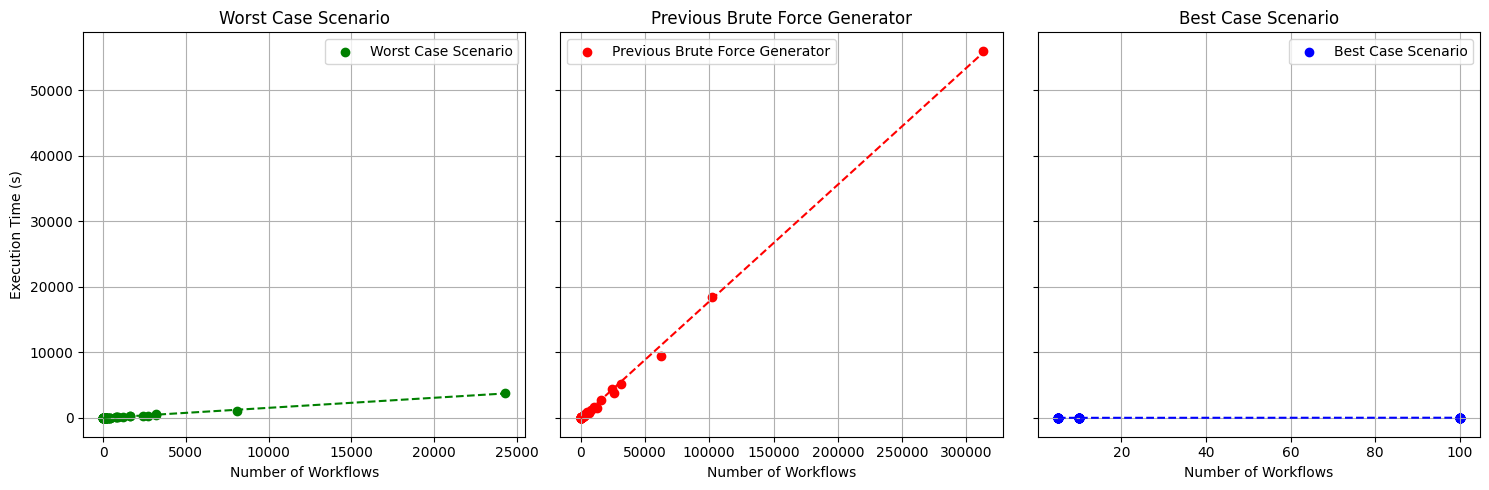

In [30]:
# Fit the polynomials for each scenario
poly1 = Polynomial.fit(results_df['bc_num_workflows'], results_df['bc_time'], deg=1)
poly2 = Polynomial.fit(results_df['wc_num_workflows'], results_df['wc_time'], deg=1)
poly3 = Polynomial.fit(results_df['bf_num_workflows'], results_df['bf_time'], deg=1)

# Determine the minimum and maximum x-values based on the data
min_x = min(results_df['bc_num_workflows'].min(), results_df['wc_num_workflows'].min(), results_df['bf_num_workflows'].min())
max_x = max(results_df['bc_num_workflows'].max(), results_df['wc_num_workflows'].max(), results_df['bf_num_workflows'].max())

# Create a range for x-axis based on the minimum and maximum values from the datasets
x_range1 = np.linspace(results_df['bc_num_workflows'].min(), results_df['bc_num_workflows'].max(), 500) #20
x_range2 = np.linspace(results_df['wc_num_workflows'].min(), results_df['wc_num_workflows'].max(), 500) #results_df['wc_num_workflows'].min(), results_df['wc_num_workflows'].max()
x_range3 = np.linspace(results_df['bf_num_workflows'].min(), results_df['bf_num_workflows'].max(), 500)

# Create subplots in a grid of 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Plot for the "Worst Case Scenario"
axs[0].scatter(results_df['wc_num_workflows'], results_df['wc_time'], color='green', label='Worst Case Scenario')
axs[0].plot(x_range2, poly2(x_range2), color='green', linestyle='--')
axs[0].set_title('Worst Case Scenario')
axs[0].set_xlabel('Number of Workflows')
axs[0].set_ylabel('Execution Time (s)')
axs[0].grid(True)
axs[0].legend()

# Plot for the "Previous Brute Force Generator"
axs[1].scatter(results_df['bf_num_workflows'], results_df['bf_time'], color='red', label='Previous Brute Force Generator')
axs[1].plot(x_range3, poly3(x_range3), color='red', linestyle='--')
axs[1].set_title('Previous Brute Force Generator')
axs[1].set_xlabel('Number of Workflows')
axs[1].grid(True)
axs[1].legend()

# Plot for the "Best Case Scenario"
axs[2].scatter(results_df['bc_num_workflows'], results_df['bc_time'], color='blue', label='Best Case Scenario')
axs[2].plot(x_range1, poly1(x_range1), color='blue', linestyle='--')
axs[2].set_title('Best Case Scenario')
axs[2].set_xlabel('Number of Workflows')
axs[2].grid(True)
axs[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

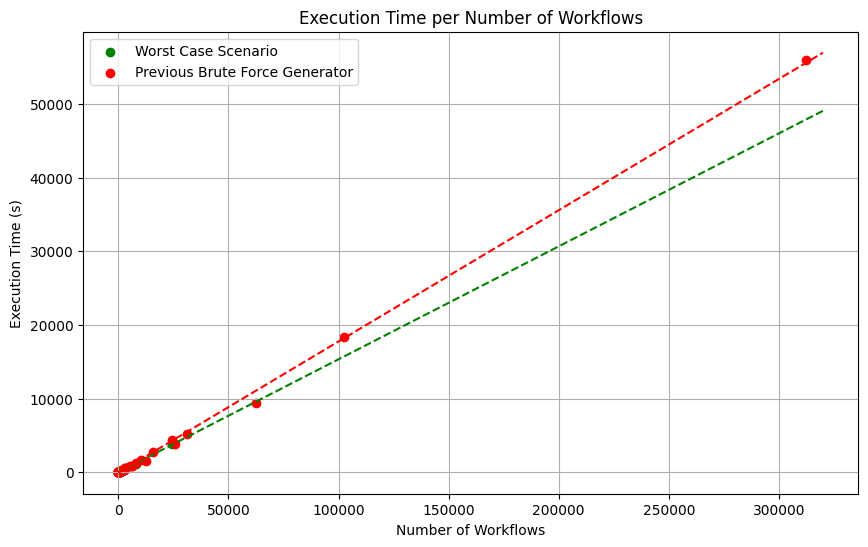

In [31]:
# poly1 = Polynomial.fit(results_df['bc_num_workflows'], results_df['bc_time'], deg=1)
poly2 = Polynomial.fit(results_df['wc_num_workflows'], results_df['wc_time'], deg=1)
poly3 = Polynomial.fit(results_df['bf_num_workflows'], results_df['bf_time'], deg=1)

x_range = np.linspace(0, 320000, 500)

plt.figure(figsize=(10, 6))

plt.scatter(results_df['wc_num_workflows'], results_df['wc_time'], color='green', label='Worst Case Scenario')
plt.scatter(results_df['bf_num_workflows'], results_df['bf_time'], color='red', label='Previous Brute Force Generator')

# plt.plot(x_range, poly1(x_range), color='blue', linestyle='--')
plt.plot(x_range, poly2(x_range), color='green', linestyle='--')
plt.plot(x_range, poly3(x_range), color='red', linestyle='--')

plt.title('Execution Time per Number of Workflows')
plt.xlabel('Number of Workflows')
plt.ylabel('Execution Time (s)')
plt.legend()
plt.grid(True)
plt.show()

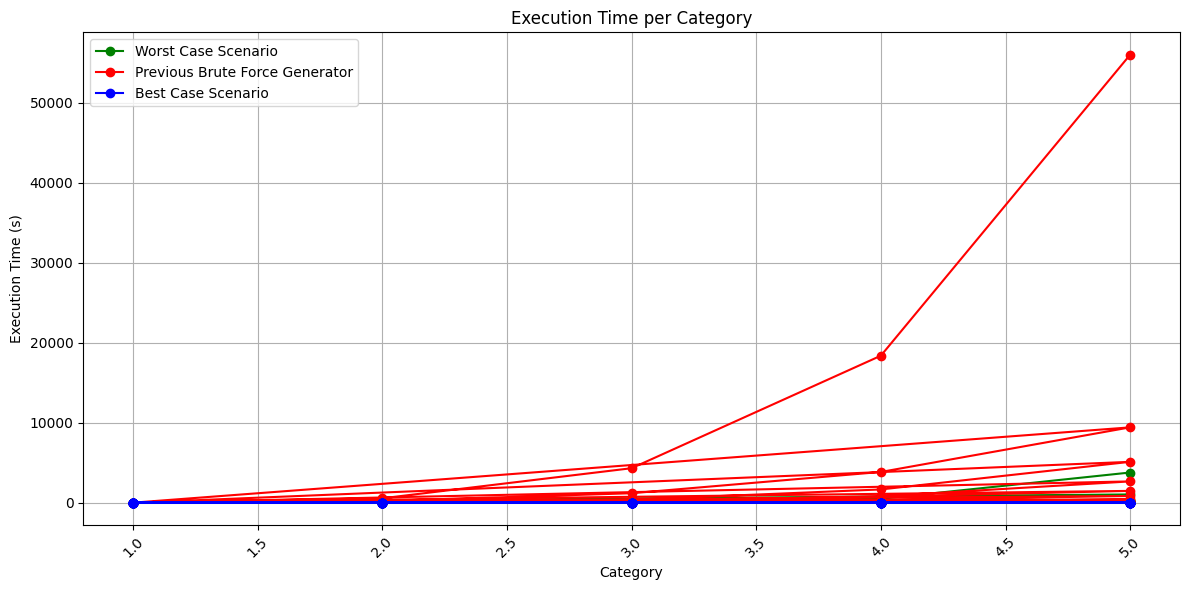

In [32]:
# Assuming your non-numeric x values are categories or labels
categories = results_df['comps_per_req']
wc_times = results_df['wc_time']
bf_times = results_df['bf_time']
bc_times = results_df['bc_time']

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the "Worst Case Scenario"
plt.plot(categories, wc_times, marker='o', linestyle='-', color='green', label='Worst Case Scenario')

# Plot the "Previous Brute Force Generator"
plt.plot(categories, bf_times, marker='o', linestyle='-', color='red', label='Previous Brute Force Generator')

# Plot the "Best Case Scenario"
plt.plot(categories, bc_times, marker='o', linestyle='-', color='blue', label='Best Case Scenario')

# Adding labels and title
plt.title('Execution Time per Category')
plt.xlabel('Category')
plt.ylabel('Execution Time (s)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability if necessary
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

## #Workflows with Comps_per_Req and Reqs_per_Comp w.r.t #Comps 

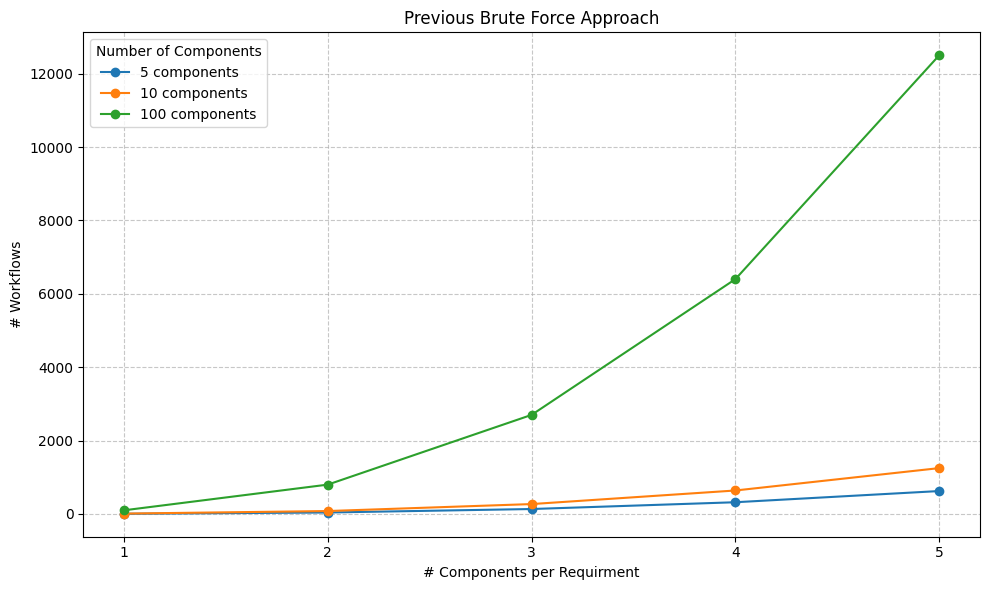

In [33]:
bf_grouped_df = results_df[results_df['reqs_per_comp'] == 3].groupby(['comps_per_req', 'comps'])['bf_num_workflows'].first().unstack()

# Create the line plot
plt.figure(figsize=(10, 6))

x_values = range(1, 6)

for column in bf_grouped_df.columns:
    plt.plot(bf_grouped_df.index, bf_grouped_df[column], label=f'{column} components', marker='o')

# Customize the plot
plt.title('Previous Brute Force Approach')
plt.xlabel('# Components per Requirment')
plt.ylabel('# Workflows')
plt.legend(title='Number of Components')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(x_values)

# Show the plot
plt.tight_layout()
plt.show()

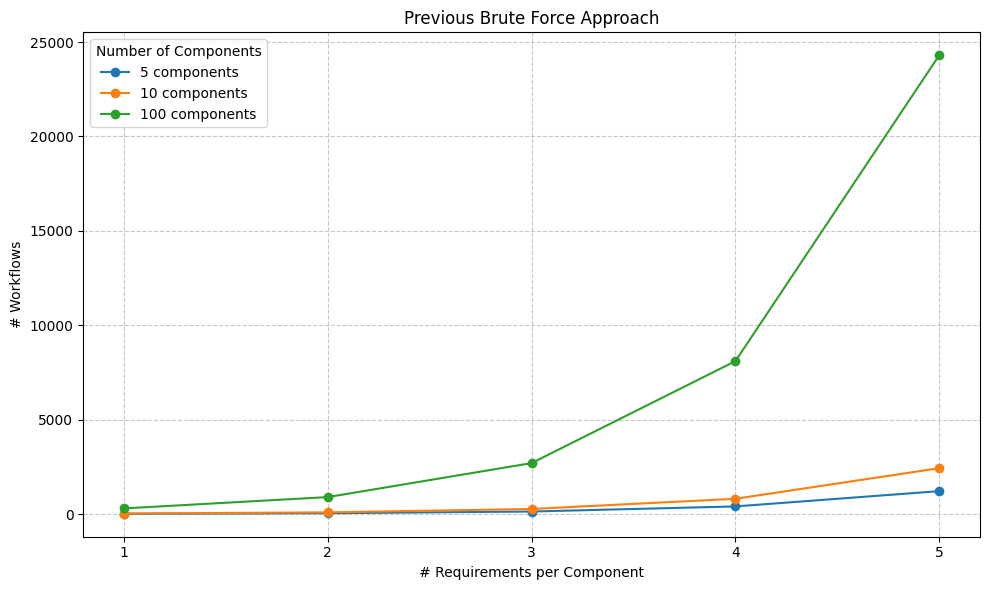

In [34]:
bf_grouped_df = results_df[results_df['comps_per_req'] == 3].groupby(['reqs_per_comp', 'comps'])['bf_num_workflows'].first().unstack()

# Create the line plot
plt.figure(figsize=(10, 6))

x_values = range(1, 6)

for column in bf_grouped_df.columns:
    plt.plot(bf_grouped_df.index, bf_grouped_df[column], label=f'{column} components', marker='o')

# Customize the plot
plt.title('Previous Brute Force Approach')
plt.xlabel('# Requirements per Component')
plt.ylabel('# Workflows')
plt.legend(title='Number of Components')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(x_values)

# Show the plot
plt.tight_layout()
plt.show()

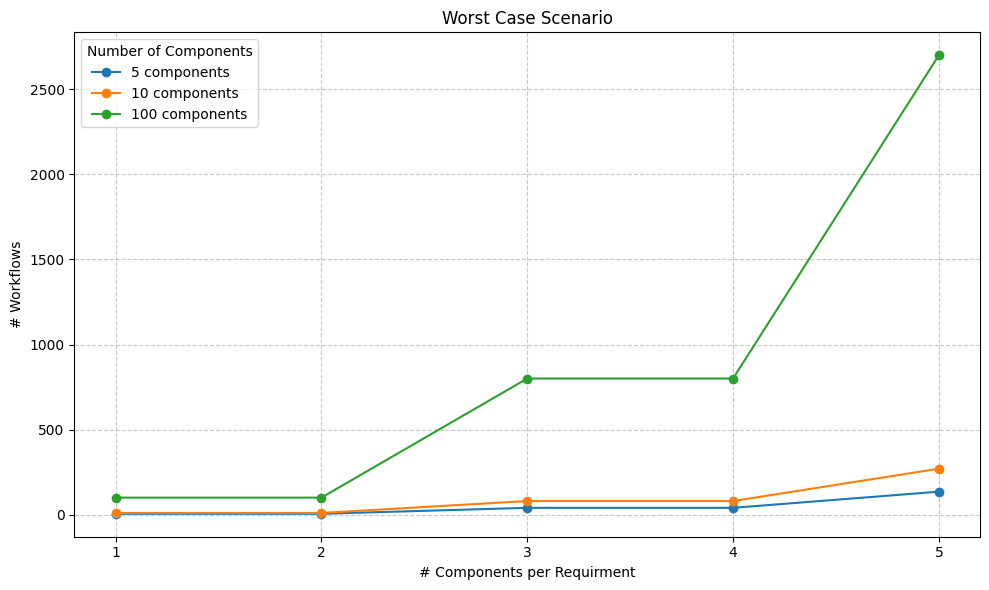

In [35]:
wc_grouped_df = results_df[results_df['reqs_per_comp'] == 3].groupby(['comps_per_req', 'comps'])['wc_num_workflows'].first().unstack()

# Create the line plot
plt.figure(figsize=(10, 6))

x_values = range(1, 6)

for column in wc_grouped_df.columns:
    plt.plot(wc_grouped_df.index, wc_grouped_df[column], label=f'{column} components', marker='o')

# Customize the plot
plt.title('Worst Case Scenario')
plt.xlabel('# Components per Requirment')
plt.ylabel('# Workflows')
plt.legend(title='Number of Components')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(x_values)

# Show the plot
plt.tight_layout()
plt.show()

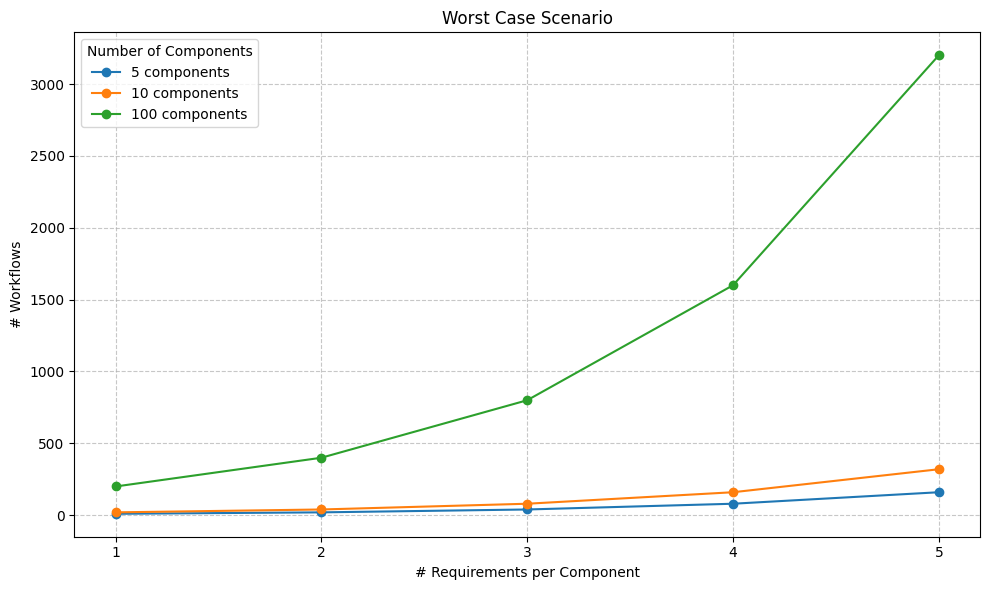

In [36]:
wc_grouped_df = results_df[results_df['comps_per_req'] == 3].groupby(['reqs_per_comp', 'comps'])['wc_num_workflows'].first().unstack()

# Create the line plot
plt.figure(figsize=(10, 6))

x_values = range(1, 6)

for column in wc_grouped_df.columns:
    plt.plot(wc_grouped_df.index, wc_grouped_df[column], label=f'{column} components', marker='o')

# Customize the plot
plt.title('Worst Case Scenario')
plt.xlabel('# Requirements per Component')
plt.ylabel('# Workflows')
plt.legend(title='Number of Components')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(x_values)

# Show the plot
plt.tight_layout()
plt.show()

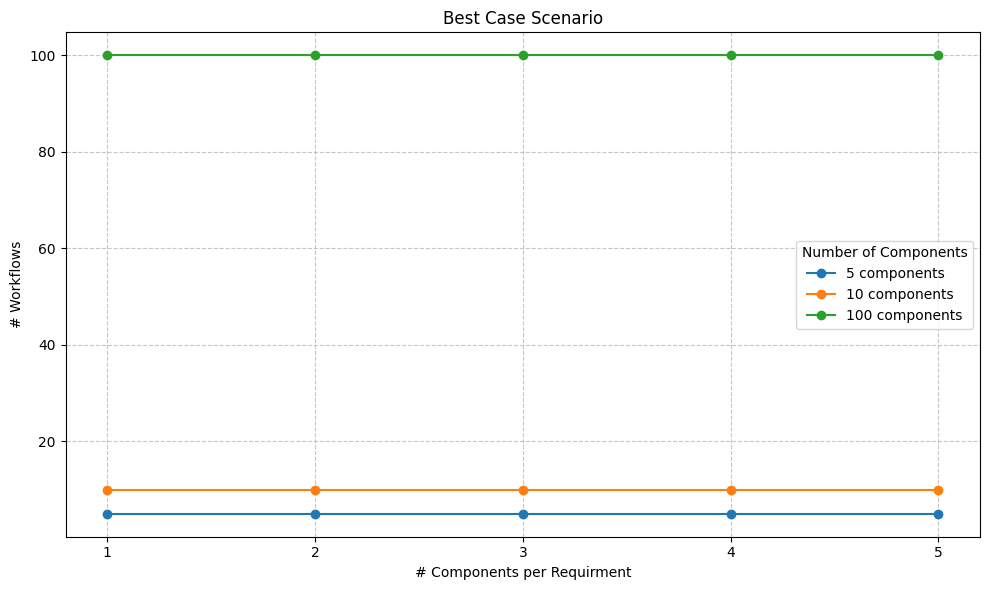

In [37]:
bc_grouped_df = results_df[results_df['reqs_per_comp'] == 3].groupby(['comps_per_req', 'comps'])['bc_num_workflows'].first().unstack()

# Create the line plot
plt.figure(figsize=(10, 6))

x_values = range(1, 6)

for column in bc_grouped_df.columns:
    plt.plot(bc_grouped_df.index, bc_grouped_df[column], label=f'{column} components', marker='o')

# Customize the plot
plt.title('Best Case Scenario')
plt.xlabel('# Components per Requirment')
plt.ylabel('# Workflows')
plt.legend(title='Number of Components')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(x_values)

# Show the plot
plt.tight_layout()
plt.show()

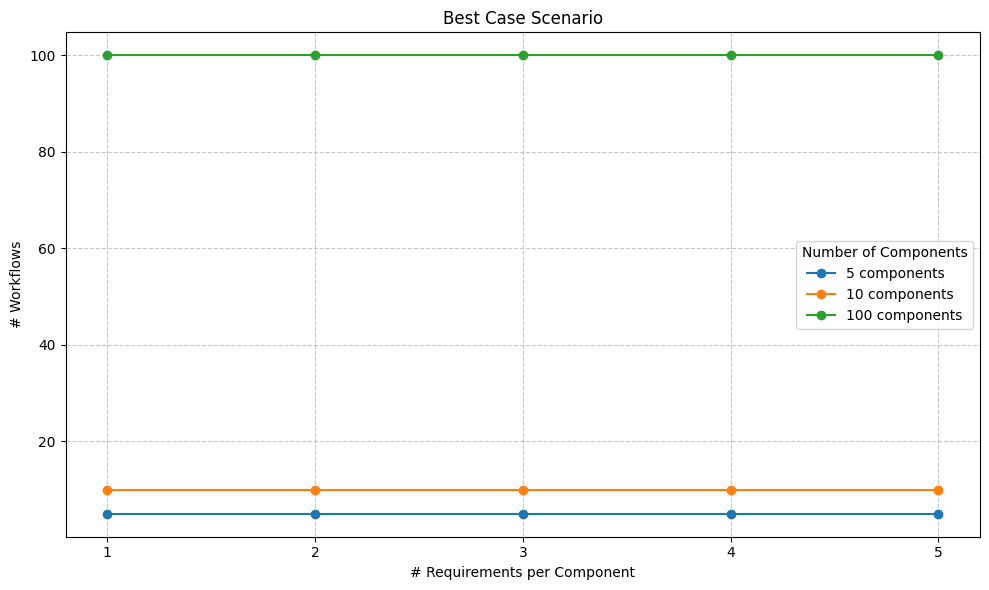

In [38]:
bc_grouped_df = results_df[results_df['comps_per_req'] == 3].groupby(['reqs_per_comp', 'comps'])['bc_num_workflows'].first().unstack()

# Create the line plot
plt.figure(figsize=(10, 6))

x_values = range(1, 6)

for column in bc_grouped_df.columns:
    plt.plot(bc_grouped_df.index, bc_grouped_df[column], label=f'{column} components', marker='o')

# Customize the plot
plt.title('Best Case Scenario')
plt.xlabel('# Requirements per Component')
plt.ylabel('# Workflows')
plt.legend(title='Number of Components')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(x_values)

# Show the plot
plt.tight_layout()
plt.show()

## Execution Time with Comps_per_Req and Reqs_per_Comp w.r.t #Comps 

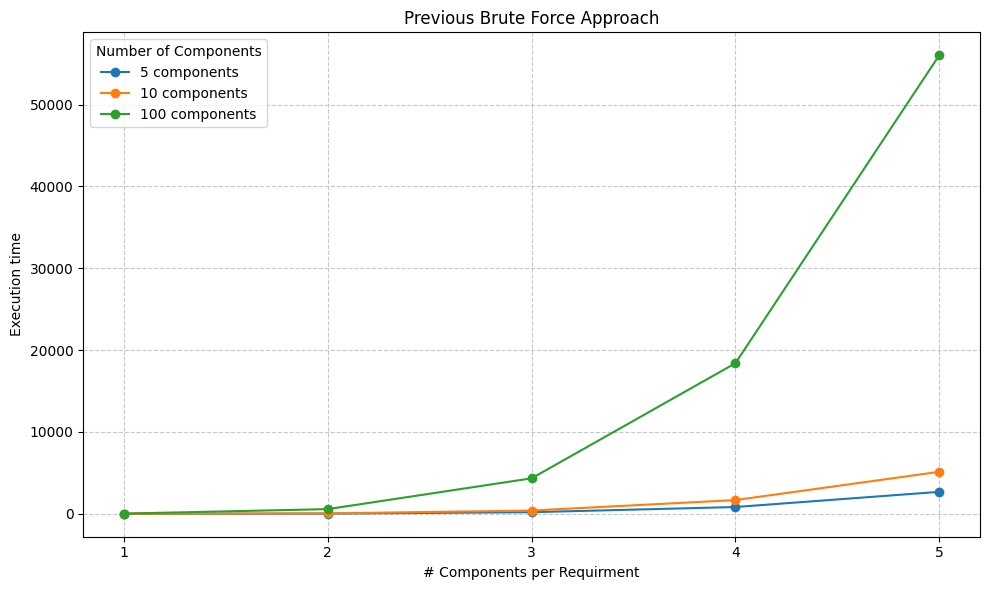

In [39]:
bf_grouped_df = results_df[results_df['reqs_per_comp'] == 3].groupby(['comps_per_req', 'comps'])['bf_time'].first().unstack()

# Create the line plot
plt.figure(figsize=(10, 6))

x_values = range(1, 6)

for column in bf_grouped_df.columns:
    plt.plot(bf_grouped_df.index, bf_grouped_df[column], label=f'{column} components', marker='o')

# Customize the plot
plt.title('Previous Brute Force Approach')
plt.xlabel('# Components per Requirment')
plt.ylabel('Execution time')
plt.legend(title='Number of Components')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(x_values)

# Show the plot
plt.tight_layout()
plt.show()

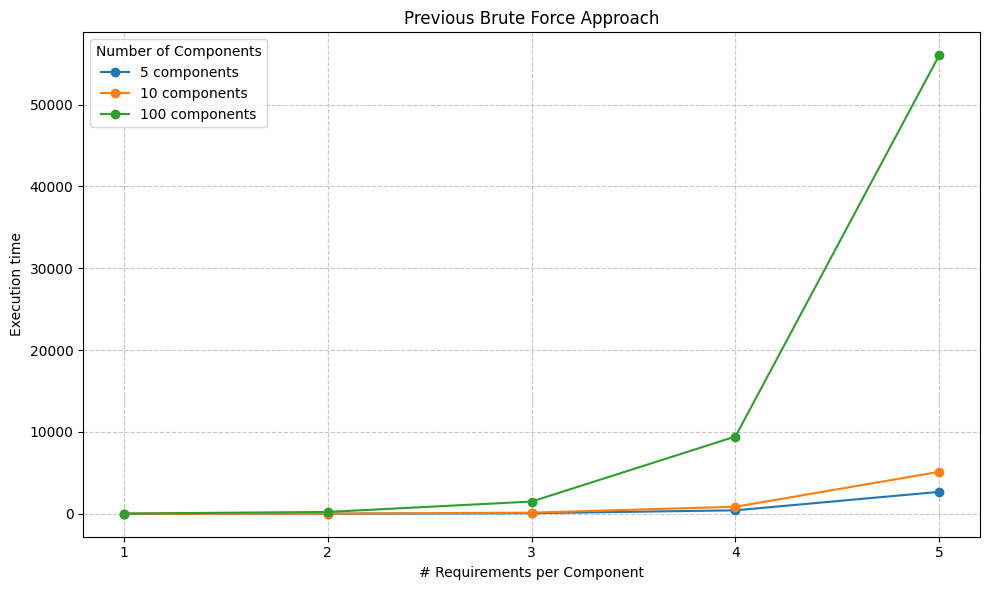

In [40]:
bf_grouped_df = results_df[results_df['comps_per_req'] == 3].groupby(['reqs_per_comp', 'comps'])['bf_time'].first().unstack()

# Create the line plot
plt.figure(figsize=(10, 6))

x_values = range(1, 6)

for column in bf_grouped_df.columns:
    plt.plot(bf_grouped_df.index, bf_grouped_df[column], label=f'{column} components', marker='o')

# Customize the plot
plt.title('Previous Brute Force Approach')
plt.xlabel('# Requirements per Component')
plt.ylabel('Execution time')
plt.legend(title='Number of Components')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(x_values)

# Show the plot
plt.tight_layout()
plt.show()

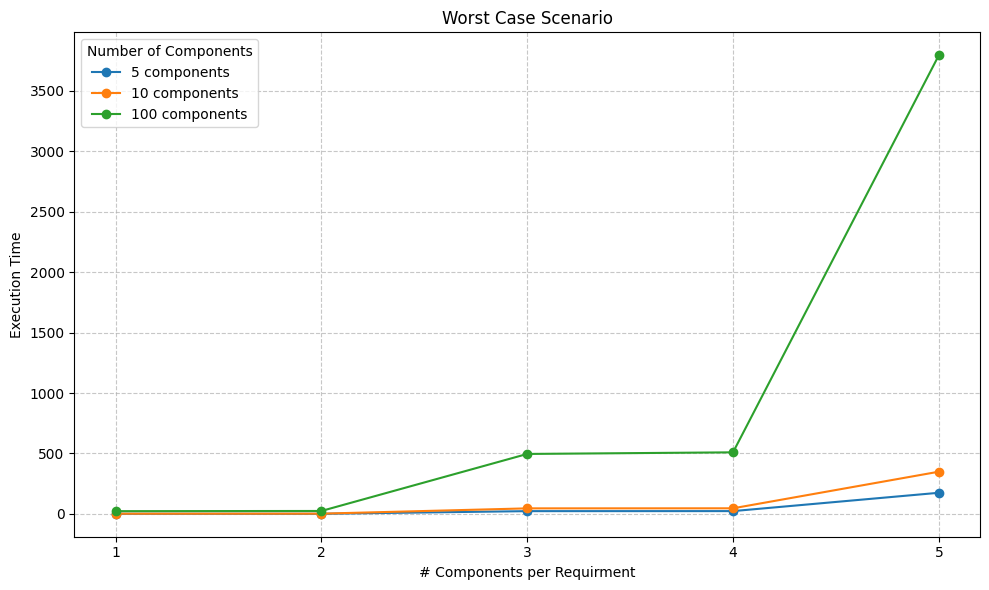

In [41]:
wc_grouped_df = results_df[results_df['reqs_per_comp'] == 3].groupby(['comps_per_req', 'comps'])['wc_time'].first().unstack()

# Create the line plot
plt.figure(figsize=(10, 6))

x_values = range(1, 6)

for column in wc_grouped_df.columns:
    plt.plot(wc_grouped_df.index, wc_grouped_df[column], label=f'{column} components', marker='o')

# Customize the plot
plt.title('Worst Case Scenario')
plt.xlabel('# Components per Requirment')
plt.ylabel('Execution Time')
plt.legend(title='Number of Components')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(x_values)

# Show the plot
plt.tight_layout()
plt.show()

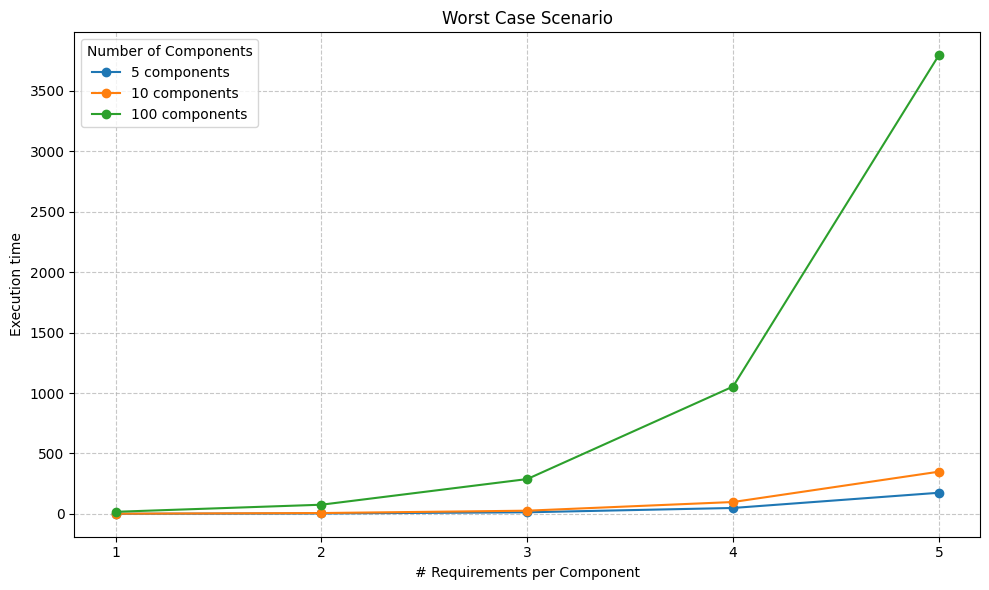

In [42]:
wc_grouped_df = results_df[results_df['comps_per_req'] == 3].groupby(['reqs_per_comp', 'comps'])['wc_time'].first().unstack()

# Create the line plot
plt.figure(figsize=(10, 6))

x_values = range(1, 6)

for column in wc_grouped_df.columns:
    plt.plot(wc_grouped_df.index, wc_grouped_df[column], label=f'{column} components', marker='o')

# Customize the plot
plt.title('Worst Case Scenario')
plt.xlabel('# Requirements per Component')
plt.ylabel('Execution time')
plt.legend(title='Number of Components')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(x_values)

# Show the plot
plt.tight_layout()
plt.show()

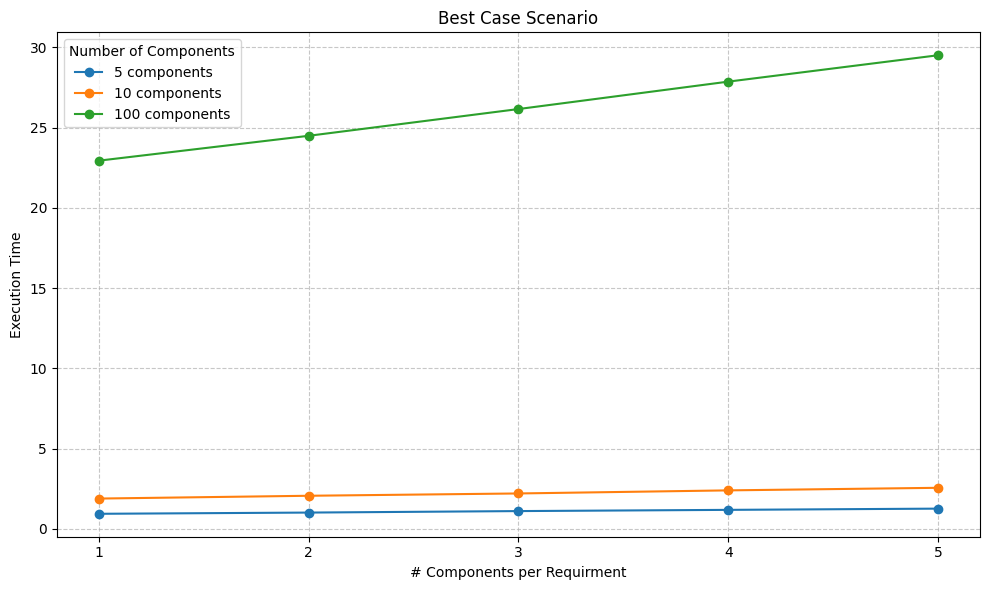

In [43]:
bc_grouped_df = results_df[results_df['reqs_per_comp'] == 3].groupby(['comps_per_req', 'comps'])['bc_time'].first().unstack()

# Create the line plot
plt.figure(figsize=(10, 6))

x_values = range(1, 6)

for column in bc_grouped_df.columns:
    plt.plot(bc_grouped_df.index, bc_grouped_df[column], label=f'{column} components', marker='o')

# Customize the plot
plt.title('Best Case Scenario')
plt.xlabel('# Components per Requirment')
plt.ylabel('Execution Time')
plt.legend(title='Number of Components')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(x_values)

# Show the plot
plt.tight_layout()
plt.show()

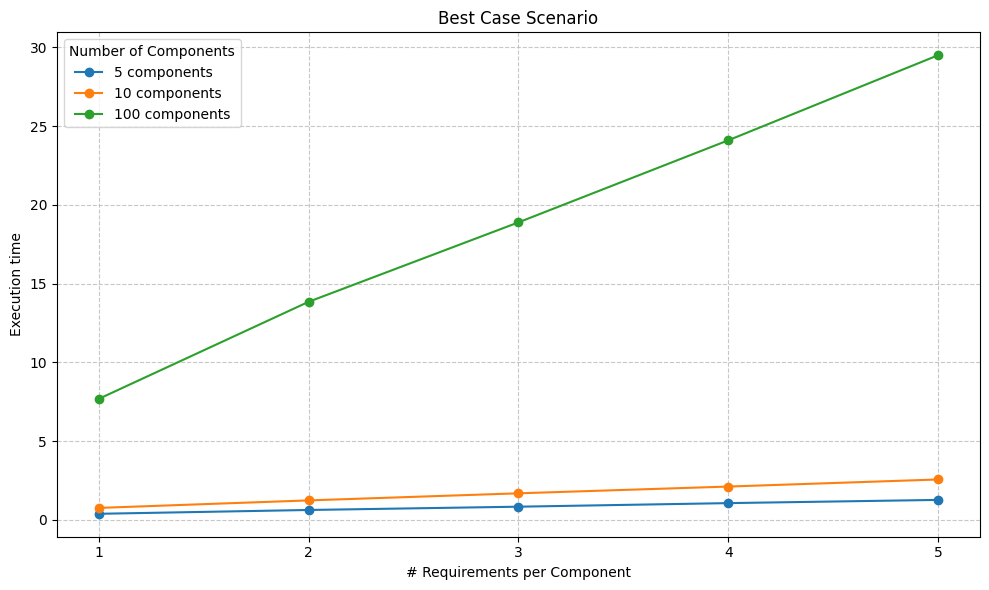

In [44]:
bc_grouped_df = results_df[results_df['comps_per_req'] == 3].groupby(['reqs_per_comp', 'comps'])['bc_time'].first().unstack()

# Create the line plot
plt.figure(figsize=(10, 6))

x_values = range(1, 6)

for column in bc_grouped_df.columns:
    plt.plot(bc_grouped_df.index, bc_grouped_df[column], label=f'{column} components', marker='o')

# Customize the plot
plt.title('Best Case Scenario')
plt.xlabel('# Requirements per Component')
plt.ylabel('Execution time')
plt.legend(title='Number of Components')
plt.grid(True, linestyle='--', alpha=0.7)

plt.xticks(x_values)

# Show the plot
plt.tight_layout()
plt.show()